In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import illustris_python.groupcat as gc
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

%matplotlib inline

In [13]:
gal_formation_hires_file = '/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat'
dtype=[('HaloID', 'i8'),('GalID', 'i8'), ('snapform', 'f8'),('zform', 'f8'),('mass', 'f8'),
       ('x', 'f8'),('y', 'f8'),('z', 'f8')]
gal_formation_hires = np.loadtxt(gal_formation_hires_file, dtype=dtype)

In [14]:
is_mw_like = (gal_formation_hires['mass']>1) & (gal_formation_hires['mass']<2)
print(np.count_nonzero(is_mw_like))
gal_formation_mw_like = gal_formation_hires[is_mw_like]

32984


In [15]:
z_form = gal_formation_mw_like['zform']

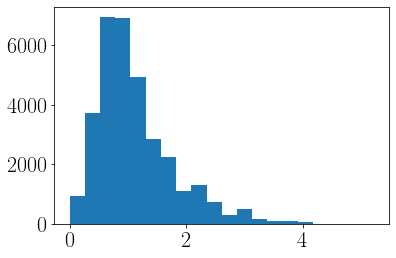

In [17]:
_=plt.hist(z_form, bins=20)

In [21]:
ii_sort = np.argsort(z_form)
gal_formation_mw_like = gal_formation_mw_like[ii_sort]

In [22]:
gal_late = gal_formation_mw_like[:len(gal_formation_mw_like)//4]
gal_early = gal_formation_mw_like[-len(gal_formation_mw_like)//4:]


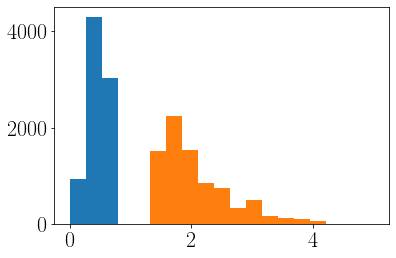

In [27]:
_=plt.hist(gal_late['zform'], bins=np.linspace(0,5,20))
_=plt.hist(gal_early['zform'], bins=np.linspace(0,5,20))

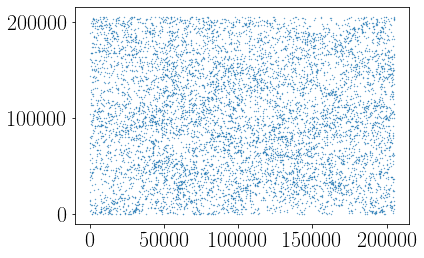

In [29]:
plt.scatter(gal_late['x'], gal_late['y'], s=0.1)

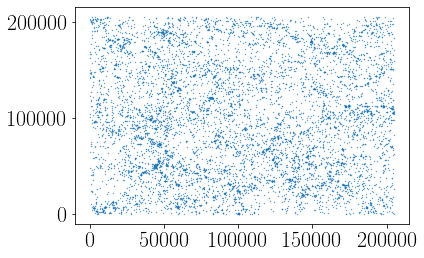

In [30]:
plt.scatter(gal_early['x'], gal_early['y'], s=0.1)

In [35]:
np.savetxt('group_A.txt', gal_early[['x','y','z']])
np.savetxt('group_B.txt', gal_early[['x','y','z']])